# PC2

**Proyecto 6: Implementación de un sistema de similaridad semántica basado en coseno y embeddings con evaluación de perplejidad y entropía**

**Descripción:** Desarrolla un sistema que mida la similaridad semántica entre palabras y
documentos utilizando el cálculo del coseno aplicado a diferentes representaciones vectoriales
(TF-IDF, Word2Vec, GloVe). Implementa un modelo de lenguaje basado en n-gramas para
calcular perplejidad y entropía, y analiza cómo estas métricas afectan la calidad de las
representaciones vectoriales. Realiza una evaluación exhaustiva utilizando pruebas de
significancia estadística para validar las relaciones encontradas.

## Semantic Similarity
La similitud semántica se refiere a la tarea de determinar qué tan similares son dos porciones de texto en base a su significado, aún cuando usan palabras diferentes


### Cosine Similarity
Para evaluar la similitud en significado de textos del corpus de wikipedia, se utilizó principalmente la similitud de coseno (cosine similarity), la cual dados 2 vectores de texto $v_1$ y $v_2$, se calcula como

$$
S_c(v_1, v_2) =  \frac{v_1\cdot v_2}{\|v_1\| \cdot \|v_2\|}
$$




## Wikipedia Corpus

In [ ]:
!pip install mwparserfromhell datasets

In [6]:
from datasets import load_dataset

wikidata = load_dataset("wikipedia", "20220301.en")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


wikipedia.py:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

The repository for wikipedia contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wikipedia.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train-00005-of-00041.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

train-00000-of-00041.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

train-00007-of-00041.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

train-00008-of-00041.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

train-00002-of-00041.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

train-00010-of-00041.parquet:   0%|          | 0.00/267M [00:00<?, ?B/s]

train-00006-of-00041.parquet:   0%|          | 0.00/366M [00:00<?, ?B/s]

train-00001-of-00041.parquet:   0%|          | 0.00/705M [00:00<?, ?B/s]

train-00013-of-00041.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

train-00009-of-00041.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

train-00003-of-00041.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00014-of-00041.parquet:   0%|          | 0.00/222M [00:00<?, ?B/s]

train-00004-of-00041.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

train-00012-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00015-of-00041.parquet:   0%|          | 0.00/236M [00:00<?, ?B/s]

train-00011-of-00041.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00016-of-00041.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

train-00017-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00018-of-00041.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00019-of-00041.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00020-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00021-of-00041.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

train-00022-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00023-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00024-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00025-of-00041.parquet:   0%|          | 0.00/218M [00:00<?, ?B/s]

train-00026-of-00041.parquet:   0%|          | 0.00/212M [00:00<?, ?B/s]

train-00027-of-00041.parquet:   0%|          | 0.00/206M [00:00<?, ?B/s]

train-00028-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00029-of-00041.parquet:   0%|          | 0.00/219M [00:00<?, ?B/s]

train-00030-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00031-of-00041.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

train-00032-of-00041.parquet:   0%|          | 0.00/200M [00:00<?, ?B/s]

train-00033-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00034-of-00041.parquet:   0%|          | 0.00/201M [00:00<?, ?B/s]

train-00035-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00036-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00037-of-00041.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00038-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00039-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00040-of-00041.parquet:   0%|          | 0.00/185M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6458670 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/41 [00:00<?, ?it/s]

## Semantic Similarity Class

Se implementa la clase `SemanticSimilarity`, la cual recibe en su constructor un corpus en forma de lista de textos (`[str,]`) para posteriormente entrenar y obtener métricas de similitud coseno y perplejidad en base al corpus inicializado



La clase implementa la vectorización de palabras usando 4 modelos **TF-IDF, Doc2Vec (con distributed memory y distributed bag of words) y N-Gramas**


- Al inicializarse, se debe ingresar como parámetros el corpus de entrenamiento y un corpus de prueba, los cuales serán limpiados a usando la expresión regular '\W', la cual hace match con caracteres que no sean alfanuméricos. También se crean los modelos para la vectorización

- `train(vec_size, num_epochs)`: Inicia el entrenamiento de los modelos creados en base al corpus. Los parámetros ingresados son exclusivamente para el entrenamiento del modelo Doc2Vec. Al finalizar el entrenamiento, llama a la función `eval_sim()` para comparar los textos de prueba con los textos del corpus

- `eval_sim(text_1, text_2)`: Evalúa 2 textos en base a las codificaciones de los 4 modelos entrenados previamente, usando la función de similitud de coseno
Finalmente, se grafica dicha similitud en heatmaps, cuyos valores varían de -1 a 1. Posteriormente, se transforma los vectores obtenidos de text_1 y text_2 usando PCA, para graficarlos en 2 dimensiones y obtener una visión gráfica de cómo estan siendo representados dichos textos. Finalmente, se llama a la función de ngram_metrics_corpus, la cual halla la perplejidad de los textos de prueba en base al n-grama generado por el entrenamiento con el corpus

- `ngram_metrics_corpus(test)`: Evalúa la perplejidad de un texto de prueba frente al modelo n-grama construido en base al corpus en el entrenamiento, obteniendo un gráfico de barras de la perplejidad de la predicción de cada texto

- `ngram_metrics(n, text_1, text_2)`: A diferencia de la función anterior, construye ngramas de longitud `n` a partir de los textos en text_1, para posteriormente hallar la perplejidad obtenida por cada uno de los textos en text_2, obteniendo así un heatmap de comparación de las perplejidades del text_2 en base al text_1

In [208]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim.downloader as api
import nltk
from nltk.util import ngrams
from nltk import word_tokenize
from collections import Counter
import math
from scipy import stats
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import re
nltk.download('punkt')


class SemanticSimilarity:
    def __init__(self, n, corpus, test):
        self.corpus = [re.sub(r'\W+', " ",text.lower()) for text in corpus]
        self.test = [re.sub(r'\W+', " ",text.lower()) for text in test]
        self.n = n
        self.vectorizer = TfidfVectorizer()
        self.count_vect = CountVectorizer(ngram_range=(1, n))

    def train(self, vec_size, num_epochs):

        self.vectorizer.fit(self.corpus)
        self.ngram_model = self.count_vect.fit_transform(self.corpus)

        documentos = [TaggedDocument(word_tokenize(doc.lower()), [i]) for i, doc in enumerate(self.corpus)]

        self.modelo_dm = Doc2Vec(documents=documentos, vector_size=vec_size, window=10, min_count=2, dm=1, epochs=num_epochs)
        self.modelo_dbow = Doc2Vec(documents=documentos, vector_size=vec_size, window=10, min_count=2, dm=0, epochs=num_epochs)

        #OUTPUT
        self.eval_sim(self.corpus, self.test, num_epochs)
        self.ngram_metrics_corpus(self.n, self.test)

    def eval_sim(self, test_doc_1, test_doc_2, num_epochs):
        pca = PCA(n_components=2)

        tfidf_sim, tfidf_1, tfidf_2  = self.tfidf_similarity(test_doc_1, test_doc_2)
        doc2vec_dm_sim, doc2vec_dbow_sim, d2v_dm_1, d2v_dm_2, d2v_dbow_1, d2v_dbow_2 = self.doc2vec_similarity(test_doc_1, test_doc_2, num_epochs)
        ngram_sim, ngram_1, ngram_2 = self.ngram_similarity(test_doc_1, test_doc_2)

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
        fig.suptitle('Cosine Similarity Matrix')
        ax1.set_title('TF-IDF')
        ax2.set_title('Doc2Vec DM')
        ax3.set_title('Doc2Vec DBOW')
        ax4.set_title('N-gram')
        c = sns.diverging_palette(220, 145, as_cmap=True)
        g1 = sns.heatmap(tfidf_sim, cmap=c, ax=ax1, vmax=1, vmin=-1)
        g2 = sns.heatmap(doc2vec_dm_sim, cmap=c, ax=ax2, vmax=1, vmin=-1)
        g3 = sns.heatmap(doc2vec_dbow_sim, cmap=c, ax=ax3, vmax=1, vmin=-1)
        g4 = sns.heatmap(ngram_sim, cmap=c, ax=ax4, vmax=1, vmin=-1)
        plt.show()

        ########
        #PCA ANALYSIS
        ########

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
        fig.suptitle('PCA (2 Components)')
        ax1.set_title('TF-IDF')
        ax2.set_title('Doc2Vec DM')
        ax3.set_title('Doc2Vec DBOW')
        ax4.set_title('N-gram')
        c = sns.diverging_palette(220, 145, as_cmap=True)
        pca1 = pca.fit_transform(tfidf_1)
        pca2 = pca.transform(tfidf_2)
        ax1.scatter(pca1[:, 0], pca1[:, 1], c='blue')
        ax1.scatter(pca2[:, 0], pca2[:, 1], c='red', marker="x")
        pca1 = pca.fit_transform(d2v_dm_1)
        pca2 = pca.transform(d2v_dm_2)
        ax2.scatter(pca1[:, 0], pca1[:, 1], c='blue')
        ax2.scatter(pca2[:, 0], pca2[:, 1], c='red', marker="x")
        pca1 = pca.fit_transform(d2v_dbow_1)
        pca2 = pca.transform(d2v_dbow_2)
        ax3.scatter(pca1[:, 0], pca1[:, 1], c='blue')
        ax3.scatter(pca2[:, 0], pca2[:, 1], c='red', marker="x")
        pca1 = pca.fit_transform(ngram_1)
        pca2 = pca.transform(ngram_2)
        ax4.scatter(pca1[:, 0], pca1[:, 1], c='blue')
        ax4.scatter(pca2[:, 0], pca2[:, 1], c='red', marker="x")
        plt.show()




    def tfidf_similarity(self, test_doc_1, test_doc_2):


        #print(tfidf_matrix.toarray())
        #print("TF-IDF Vocabulary:", vectorizer.get_feature_names_out())

        # Construir la representación TF-IDF para el documento de prueba
        test_vec_1 = self.vectorizer.transform(test_doc_1)
        test_vec_2 = self.vectorizer.transform(test_doc_2)

        # Calcular la similaridad de coseno entre documentos
        cosine_sim = cosine_similarity(test_vec_1, test_vec_2)
        # print("TF-IDF Cosine Similarity Matrix:\n", cosine_sim)

        # sns.heatmap(cosine_sim, cmap="crest")
        # plt.title('Correlation Between Documents')
        # plt.show()

        return cosine_sim, test_vec_1, test_vec_2

    def doc2vec_similarity(self, test_doc_1, test_doc_2, num_epochs):

        test_vec_dm_1 = []
        test_vec_dm_2 = []
        test_vec_dbow_1 = []
        test_vec_dbow_2 = []

        for i in range(len(test_doc_1)):
            test_vec_dm_1.append(self.modelo_dm.infer_vector(word_tokenize(re.sub(r'\W+', " ",test_doc_1[i].lower())), epochs=num_epochs ))
            test_vec_dbow_1.append(self.modelo_dbow.infer_vector(word_tokenize(re.sub(r'\W+', " ",test_doc_1[i].lower())),epochs=num_epochs ))
        for i in range(len(test_doc_2)):
            test_vec_dm_2.append(self.modelo_dm.infer_vector(word_tokenize(re.sub(r'\W+', " ",test_doc_2[i].lower())),epochs=num_epochs ))
            test_vec_dbow_2.append(self.modelo_dbow.infer_vector(word_tokenize(re.sub(r'\W+', " ",test_doc_2[i].lower())),epochs=num_epochs ))

        cosine_sim_dm = cosine_similarity(test_vec_dm_1, test_vec_dm_2)
        cosine_sim_dbow = cosine_similarity(test_vec_dbow_1, test_vec_dbow_2)

        # print(cosine_sim_dm)
        # print("Doc2Vec Cosine Similarity Matrix:\n", cosine_sim)
        # sns.heatmap(cosine_sim, cmap="crest")
        # plt.title('Correlation Between Documents')
        # plt.show()
        return cosine_sim_dm, cosine_sim_dbow, test_vec_dm_1, test_vec_dm_2, test_vec_dbow_1, test_vec_dbow_2

    def ngram_similarity(self, test_doc_1, test_doc_2):
        #Construccion la representacion BOW para el corpus
        #Mapeo del vocabulario
        #print("El vocabulario: ", count_vect.vocabulary_)
        # print("Representacion BoW para 'dog bites man': ", bow_rep[0].toarray())
        # print("Representacion BoW para 'man bites dog: ",bow_rep[1].toarray())

        test_vec_1 = self.count_vect.transform(test_doc_1)
        test_vec_2 = self.count_vect.transform(test_doc_2)

        cosine_sim = cosine_similarity(test_vec_1, test_vec_2)

        # print("N-gram Cosine Similarity Matrix:\n", cosine_sim)
        # sns.heatmap(cosine_sim, cmap="crest")
        # plt.title('Correlation Between Documents')
        # plt.show()
        return cosine_sim, test_vec_1, test_vec_2

    def ngram_metrics_corpus(self, n, test_doc):
      # Function to compute n-gram probability
        test_doc = [re.sub(r'\W+', " ",text.lower()) for text in test_doc]
        ngram_counts = np.asarray(self.ngram_model.sum(axis=0)).flatten()
        #print(ngram_counts)
        vocab = self.count_vect.vocabulary_
        # print(vocab)
        sum_words = self.ngram_model.sum(axis = 0)
        words_freq = {word: sum_words[0, i] for word, i in vocab.items()}
        # print(words_freq)

        def ngram_prob(ngram):

            context = ngram[:-1]
            ngram_text = " ".join(ngram)
            context_text = " ".join(context)
            # print(context_text)
            # print(context_counts)

            # print(ngram_text, " / ", context_text)
            # print(words_freq.get(ngram_text, 0) + 0.5, "/", words_freq.get(context_text, 0) + 0.5*len(self.count_vect.vocabulary_))
            prob = (words_freq.get(ngram_text, 0) + 0.1)/ (words_freq.get(context_text, 0) + 0.1*len(self.count_vect.vocabulary_))
            # print(prob)
            return prob

        # Test sentence for perplexity calculation

        y = []
        for test_sentence in test_doc:
            # print("-------------------------")
            test_tokens = nltk.word_tokenize(test_sentence)
            # print(test_tokens)
            test_ngrams = list(ngrams(test_tokens, n))
            # print(context_counts)
            # print(test_ngrams)
            # Compute perplexity
            log_prob_sum = 0
            if(len(test_ngrams)==0):
              y.append(1)
              continue
            for ngram in test_ngrams:
                prob = ngram_prob(ngram)
                log_prob_sum += np.log2(prob)

            # print("SUM_PROB",log_prob_sum)
            entropy = np.sum([-ngram_prob(ngram)*np.log2(ngram_prob(ngram)) for ngram in test_ngrams])
            # Calculate perplexity
            # print("Test text: ",test_sentence[:50], "...")
            perplexity = 2**(-log_prob_sum / len(test_ngrams))
            y.append(perplexity)
            # print(f"Perplexity of the test sentence: {perplexity}")
            # print(f"Entropy of the test sentence: {entropy}")

        my_cmap = plt.get_cmap("YlGn")
        rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
        plt.bar(range(len(test_doc)), y, color=my_cmap(rescale(len_corpus)))
        plt.title('Perplexity vs Corpus')
        plt.xlabel('Test Sentence')
        plt.ylabel('Perplexity')
        plt.show()

    def ngram_metrics(self, n, test_doc_1, test_doc_2):
      # Function to compute n-gram probability
        test_doc_1 = [re.sub(r'\W+', " ",text.lower()) for text in test_doc_1]
        test_doc_2 = [re.sub(r'\W+', " ",text.lower()) for text in test_doc_2]

        def ngram_prob(ngram):

            context = ngram[:-1]
            ngram_text = " ".join(ngram)
            context_text = " ".join(context)
            # print(context_text)
            # print(context_counts)

            # print(ngram_text, " / ", context_text)
            # print(words_freq.get(ngram_text, 0) + 1, "/", words_freq.get(context_text, 0) + len(self.count_vect_metric.vocabulary_))
            prob = (words_freq.get(ngram_text, 0) + 0.5)/ (words_freq.get(context_text, 0) + 0.5*len(self.count_vect_metric.vocabulary_))
            # print(prob)
            return prob

        # Test sentence for perplexity calculation

        y = []
        self.count_vect_metric = CountVectorizer(ngram_range=(1, n))
        for test in test_doc_1:
            # print("-"*10)
            # print("Text_corpus", test[:100], "...")
            # print("-"*10)
            x=[]
            self.ngram_model_metric = self.count_vect_metric.fit_transform([test])
            ngram_counts = np.asarray(self.ngram_model_metric.sum(axis=0)).flatten()
            #print(ngram_counts)
            vocab = self.count_vect_metric.vocabulary_
            # print(vocab)
            sum_words = self.ngram_model_metric.sum(axis = 0)
            words_freq = {word: sum_words[0, i] for word, i in vocab.items()}
            for test_sentence in test_doc_2:
                # print("-------------------------")
                test_tokens = nltk.word_tokenize(test_sentence)
                # print(test_tokens)
                test_ngrams = list(ngrams(test_tokens, n))
                #print(context_counts)
                # print(test_ngrams)
                # Compute perplexity
                log_prob_sum = 0
                if(len(test_ngrams)==0):
                  x.append(1)
                  continue
                for ngram in test_ngrams:
                    prob = ngram_prob(ngram)
                    log_prob_sum += np.log2(prob)

                # print("SUM_PROB",log_prob_sum)
                entropy = np.sum([-ngram_prob(ngram)*np.log2(ngram_prob(ngram)) for ngram in test_ngrams])
                # Calculate perplexity
                # print("Test text: ",test_sentence[:50], "...")
                perplexity = 2**(-log_prob_sum / len(test_ngrams))
                x.append(perplexity)
                # print(f"Perplexity of the test sentence: {perplexity}")
                # print(f"Entropy of the test sentence: {entropy}")
            y.append(x)

        sns.heatmap(y, cmap=sns.light_palette("seagreen", as_cmap=True, reverse=True), vmin=1)
        plt.title('Perplexity vs Test Sentence')
        plt.xlabel('Test Sentence')
        plt.ylabel('N-gram')
        plt.show()



test = [
    "!Gensim es una biblioteca de modelado de temas de Python",
    "Gensim incluye implementaciones de Word2Vec, Doc2Vec, y otros modelos",
    "Los embeddings de palabras son útiles para tareas de procesamiento de lenguaje natural",
    "Gensim es una biblioteca que implementa Word2Vec",
    "Gensim es una biblioteca que implementa Doc2Vec",
    "Los embeddings de palabras se utilizan en el procesamiento de lenguaje"
]

# test = ["Gensim es una biblioteca que implementa Word2Vec", "Gensim implementa Word2Vec"]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Ejemplo

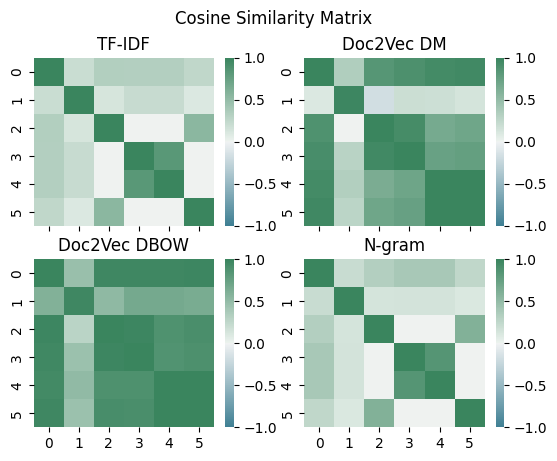

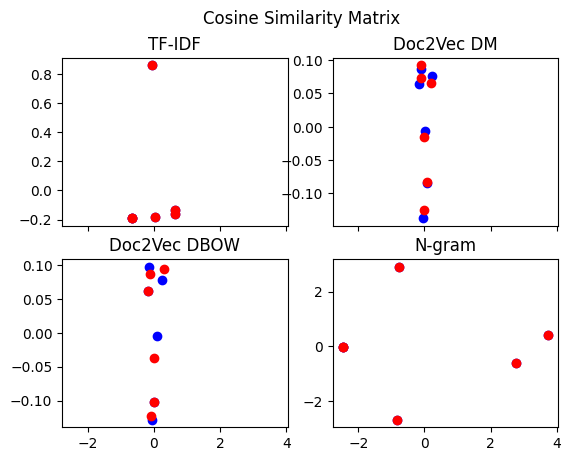

Perplexity of the test sentence: 7.039611440230185
Perplexity of the test sentence: 14.712588908991215
Perplexity of the test sentence: 6.72255562252915
Perplexity of the test sentence: 4.150848236095214
Perplexity of the test sentence: 4.150848236095214
Perplexity of the test sentence: 6.134482496842417


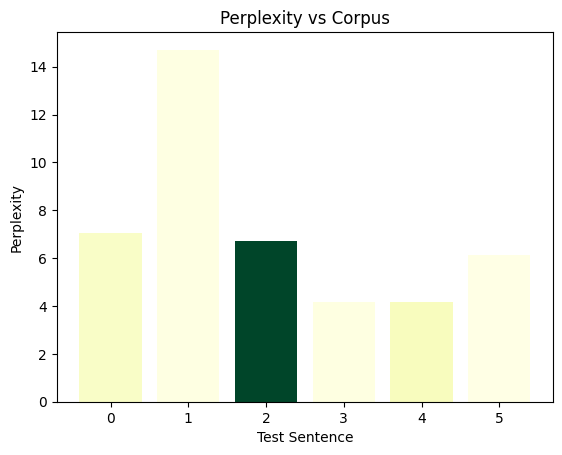

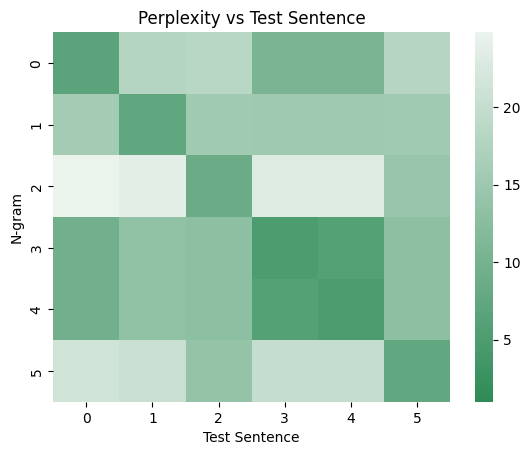

In [179]:

# test = [
#     "dog bites man",
#     "man bites dog",
#     "dog and dog are friends",
#     "dog bites are strong"
# ]
semantic_sim = SemanticSimilarity(2,test, test)
semantic_sim.train(vec_size =3, num_epochs=100)
semantic_sim.ngram_metrics(2, test, test)

## Testing


- El corpus usado para el entrenamiento son artículos de wikipedia elegidos al azar
- El corpus de prueba son fragmentos aleatorios de los articulos escogidos para el corpus.

### 10 texts

In [184]:
import time
times = []

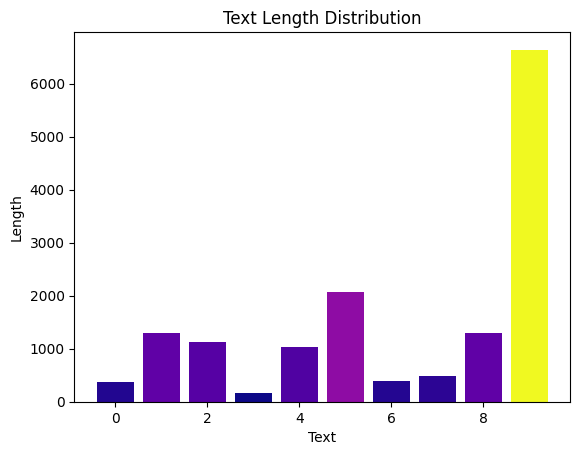

['e people with the name include:\n\nKrys Barch (born 19', '1 August 2017, he moved to CF Fuenlabrada in the same category, also in a temporary deal.\n\nFernández returned to Real Madrid in July 2018, being assigned to', ' the age of five, became a pupil at the Conservatoire de Charleville-Mézières in 1984, and gained his diploma at the Conservatoire de Nancy in 1989. In 2009 he was awarded the Django Reinhardt ', 'uba on 8 August.\n\nResults\n\nReferences\n\nAthletics at the 1991 Pan American Games\n1991', "ter Schools Rugby Senior Cup, featuring in the same back-row as Munster academy member and Ireland under-20s captain Alex Kendellen. Following the disruption caused by the province's recent tour to ", 'om a U.S. Air Force F-104D Starfighter supersonic aircraft that was "racing the moon\'s shadow" at  extending the duration of totality. He also conducted several expeditions between 1', "Japanese former ice hockey player. He competed in the men's tournaments at the 1964 Winter Olympi

In [202]:
corpus = []
test = []
len_corpus = []
size=10

for _ in range(size):
    # Select a random document from the dataset
    random_doc_idx = np.random.randint(0, len(wikidata["train"]))  # Random index for document
    text = wikidata["train"][random_doc_idx]["text"]  # Extract text from random document
    corpus.append(text)  # Add document to the corpus
    len_corpus.append(len(text))  # Store the length of the document

    # Now select a random phrase from the text
    if len(text) > 0:  # Ensure the document is not empty
        r = np.random.randint(0, len(text) // 2)  # Random starting point (half text length)
        phrase_length = np.random.randint(50, 200)  # Random length for the phrase (between 5 and 20 words)
        phrase = text[r:r + phrase_length]  # Extract the random phrase
        test.append(phrase)  # Add random phrase to test


my_cmap = plt.get_cmap("plasma")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(range(size), len_corpus, color=my_cmap(rescale(len_corpus)))
plt.xlabel("Text")
plt.ylabel("Length")
plt.title("Text Length Distribution")
plt.show()
print(test)

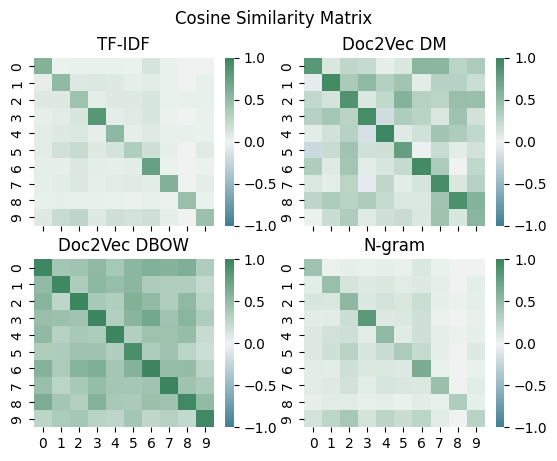

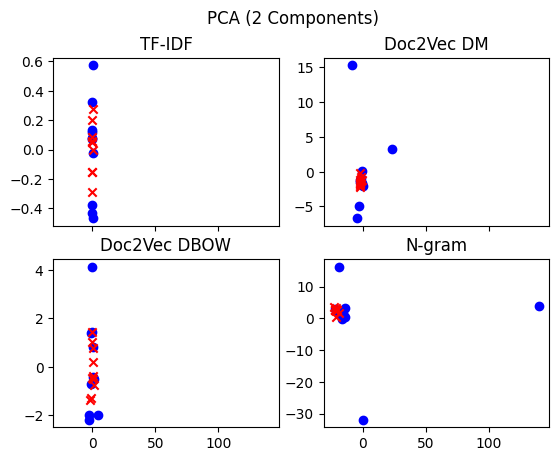

Perplexity of the test sentence: 836.2781825334723
Perplexity of the test sentence: 647.9935948859735
Perplexity of the test sentence: 531.0146857205762
Perplexity of the test sentence: 675.4869850441464
Perplexity of the test sentence: 612.6637537761954
Perplexity of the test sentence: 1138.3385658041457
Perplexity of the test sentence: 640.3424312957023
Perplexity of the test sentence: 519.3598259464845
Perplexity of the test sentence: 598.6579907827614
Perplexity of the test sentence: 520.0158936142117


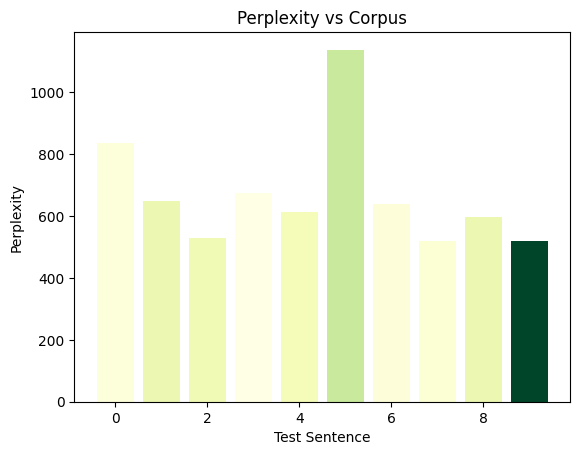

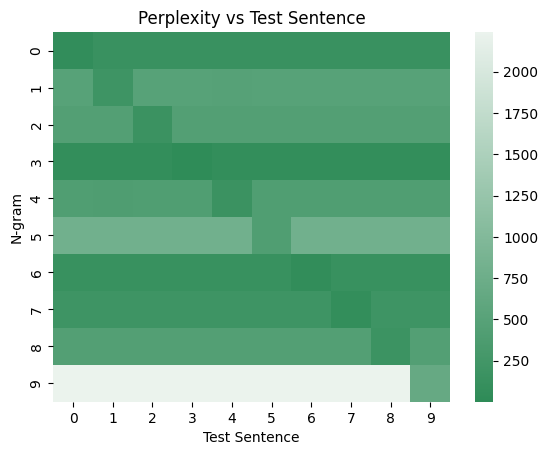

In [203]:
semantic_sim = SemanticSimilarity(3,corpus, test)
start_time = time.time()
semantic_sim.train(vec_size=50, num_epochs=100)
end_time = time.time()

execution_time = end_time - start_time
times.append(execution_time)
semantic_sim.ngram_metrics(3, corpus, test)

Se compara las similitudes obtenidas por las inferencias de los vectores en los modelos Doc2Vec con las similitudes del método `Doc2Vec.dv.most_similar()` aplicado a cada texto del corpus

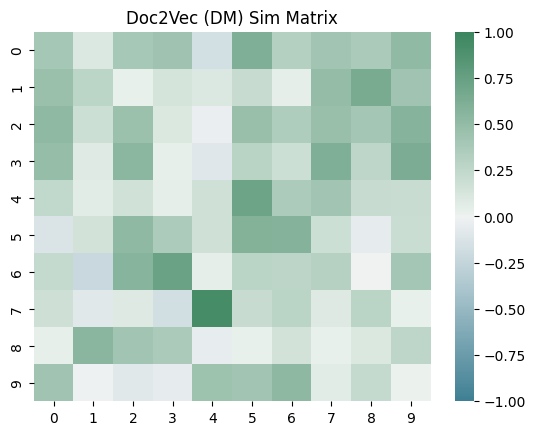

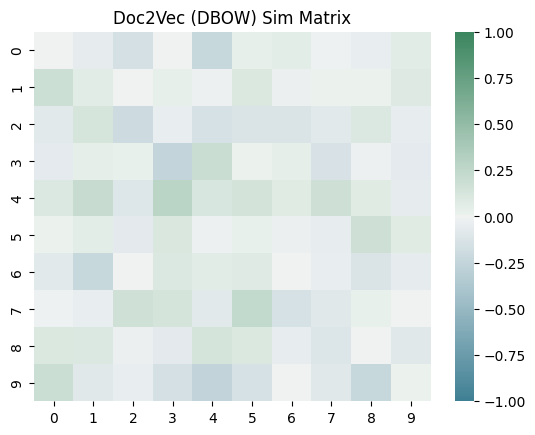

In [197]:
semantic_sim_dm = np.zeros((len(corpus), len(corpus)))
semantic_sim_dbow = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
  sim1 = semantic_sim.modelo_dm.dv.most_similar(semantic_sim.modelo_dm[i])
  sim2 = semantic_sim.modelo_dbow.dv.most_similar(semantic_sim.modelo_dbow[i])
  for s in sim1:
    semantic_sim_dm[i][s[0]] = s[1]
  for s in sim2:
    semantic_sim_dbow[i][s[0]] = s[1]

# print(semantic_sim_dm)
# print(semantic_sim_dbow)

c = sns.diverging_palette(220, 145, as_cmap=True)
sns.heatmap(semantic_sim_dm, cmap=c, vmin=-1, vmax=1)
plt.title('Doc2Vec (DM) Sim Matrix')
plt.show()

c = sns.diverging_palette(220, 145, as_cmap=True)
sns.heatmap(semantic_sim_dbow, cmap=c, vmin=-1, vmax=1)
plt.title('Doc2Vec (DBOW) Sim Matrix')
plt.show()

Usamos los modelos entrenados para poder analizar las similitudes entre los textos presentados a continuación, con contenidos similiares y distintos en significado

TEXTOS OPUESTOS


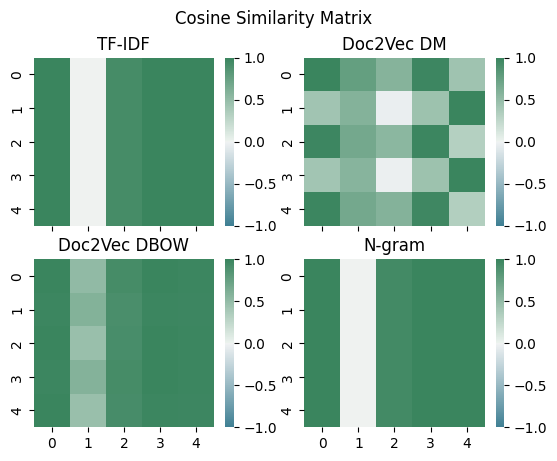

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:794: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


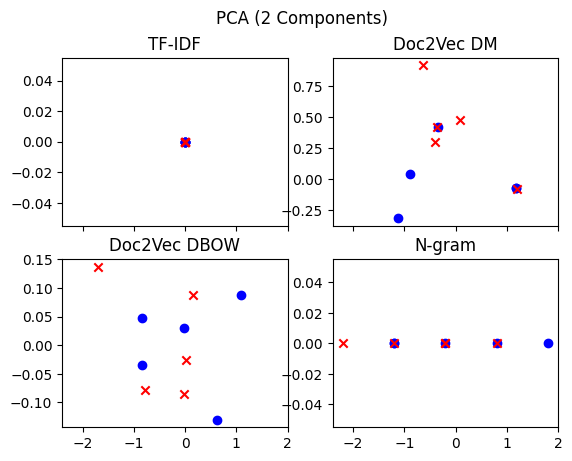

TEXTOS SIMILARES


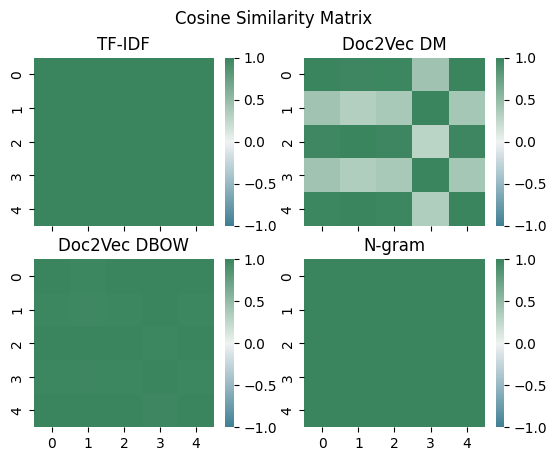

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:794: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


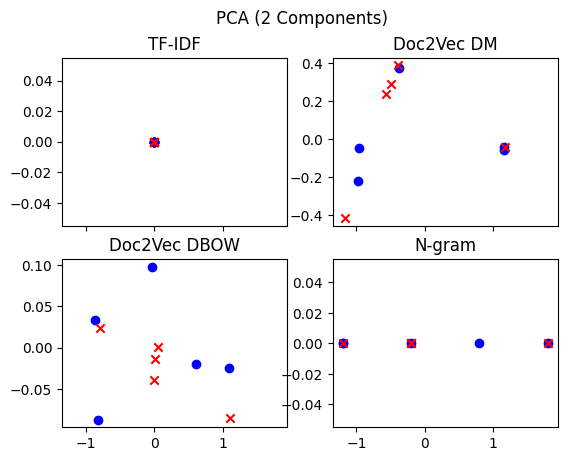

TEXTOS OPUESTOS


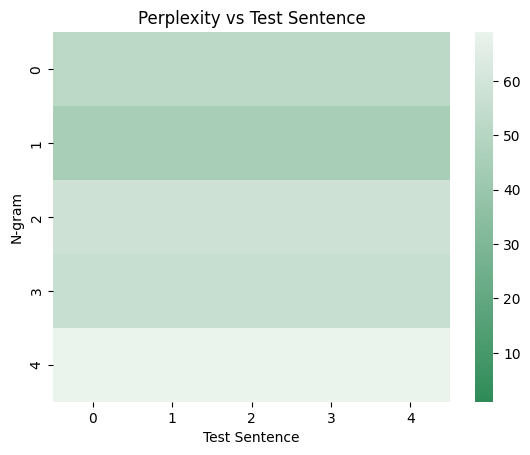

TEXTOS SIMILARES


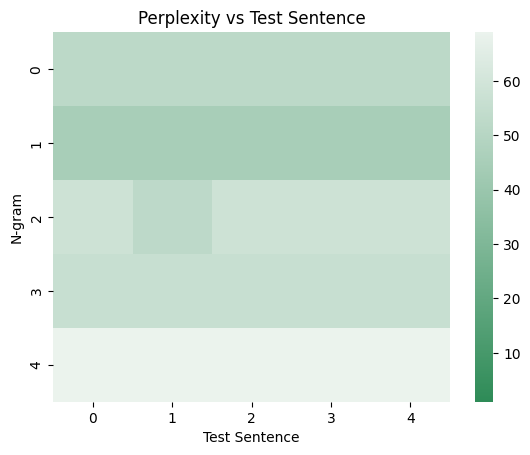

Perplexity of the test sentence: 14148.999999999989
Perplexity of the test sentence: 14148.999999999989
Perplexity of the test sentence: 14149.000000000007
Perplexity of the test sentence: 14149.000000000007
Perplexity of the test sentence: 14148.999999999989


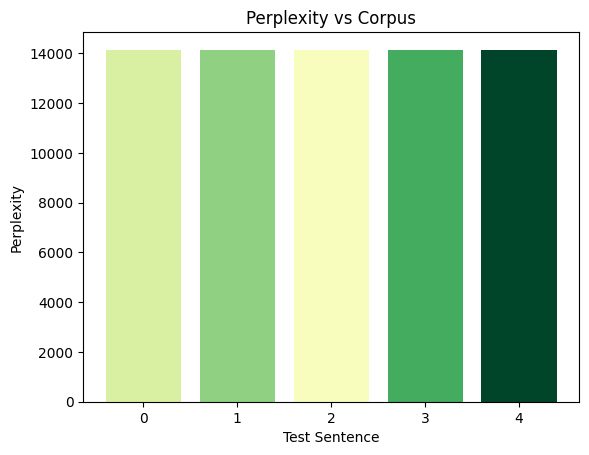

Perplexity of the test sentence: 14148.999999999989
Perplexity of the test sentence: 14149.000000000007
Perplexity of the test sentence: 14149.000000000007
Perplexity of the test sentence: 14149.000000000007
Perplexity of the test sentence: 14148.999999999989


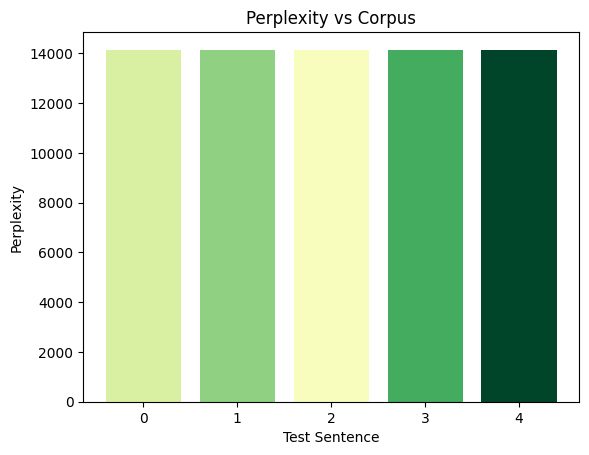

Perplexity of the test sentence: 14149.000000000007
Perplexity of the test sentence: 14148.999999999989
Perplexity of the test sentence: 14149.000000000007
Perplexity of the test sentence: 14148.999999999989
Perplexity of the test sentence: 14149.000000000007


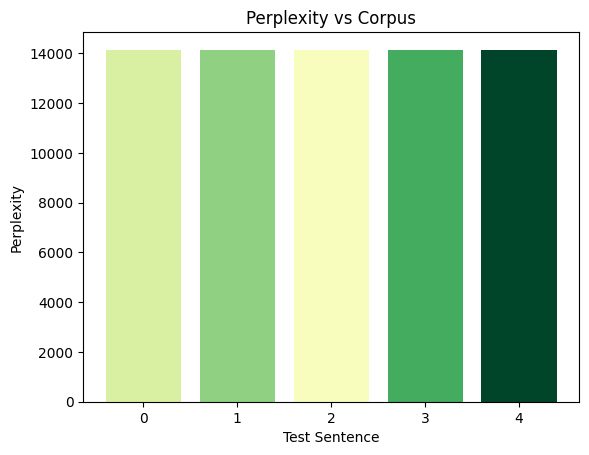

In [199]:
text_test = [
    "La energía solar se ha convertido en una de las fuentes más accesibles y sostenibles para la generación de electricidad.",
    "Las turbinas eólicas modernas pueden generar electricidad suficiente para alimentar miles de hogares en áreas rurales.",
    "La transición a fuentes de energía renovable es clave para reducir las emisiones de gases de efecto invernadero y combatir el cambio climático.",
    "Las innovaciones en energía geotérmica están permitiendo aprovechar el calor de la Tierra para generar electricidad y calefacción en diversas regiones.",
    "Los avances en tecnología de baterías han mejorado la capacidad de almacenamiento de energía renovable, facilitando la integración de fuentes solares y eólicas en la red eléctrica."
]


textos_opuestos = [
    "La cocina mediterránea es conocida por su uso de ingredientes frescos, como el aceite de oliva, los tomates y las hierbas aromáticas.",
    "La cocina molecular ha revolucionado la gastronomía moderna, combinando la ciencia con la creatividad para crear experiencias culinarias únicas.",
    "Los restaurantes de comida callejera en Asia ofrecen una diversidad de sabores auténticos que reflejan la riqueza cultural de la región.",
    "El aumento de las dietas basadas en plantas ha llevado a un auge en las opciones de comida vegana y vegetariana en todo el mundo.",
    "El arte de hacer sushi se ha transmitido durante generaciones, combinando ingredientes frescos y técnicas precisas para crear platos visualmente impresionantes."
]

textos_similares = [
    "La eficiencia energética se ha vuelto crucial para minimizar el desperdicio de recursos y reducir la huella de carbono global.",
    "El uso de vehículos eléctricos está ayudando a disminuir la dependencia de los combustibles fósiles y reducir las emisiones de dióxido de carbono.",
    "La agricultura sostenible busca integrar prácticas que respeten el medio ambiente y promuevan el uso de recursos naturales de manera equilibrada.",
    "Las ciudades inteligentes están adoptando tecnologías verdes para mejorar el uso eficiente de la energía y los recursos en las áreas urbanas.",
    "El reciclaje de materiales y la reducción de residuos son pasos esenciales para avanzar hacia una economía circular más respetuosa con el medio ambiente."
]

print("TEXTOS OPUESTOS")
semantic_sim.eval_sim(text_test, textos_opuestos, num_epochs=100)
print("TEXTOS SIMILARES")
semantic_sim.eval_sim(text_test, textos_similares, num_epochs=100)

print("TEXTOS OPUESTOS")
semantic_sim.ngram_metrics(3, text_test, textos_opuestos)
print("TEXTOS SIMILARES")
semantic_sim.ngram_metrics(3, text_test, textos_similares)

semantic_sim.ngram_metrics_corpus(3, text_test)
semantic_sim.ngram_metrics_corpus(3, textos_similares)
semantic_sim.ngram_metrics_corpus(3, textos_opuestos)

### 50 texts

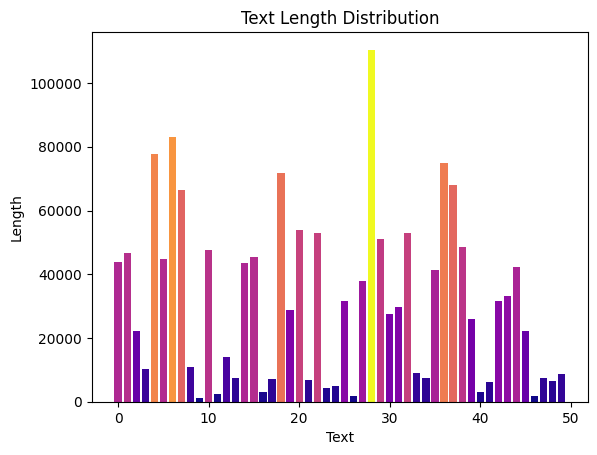

In [204]:
corpus = []
test = []
len_corpus = []
size=50

for text in wikidata["train"][0:size]["text"]:
  corpus = corpus + [text]
  len_corpus.append(len(corpus[-1]))
  r = np.random.randint(0, len(text)/2)
  test = test + [text[r:2*r]]


my_cmap = plt.get_cmap("plasma")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(range(size), len_corpus, color=my_cmap(rescale(len_corpus)))
plt.xlabel("Text")
plt.ylabel("Length")
plt.title("Text Length Distribution")
plt.show()

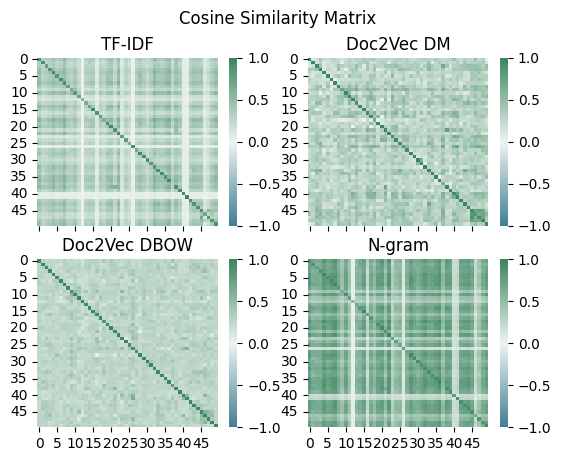

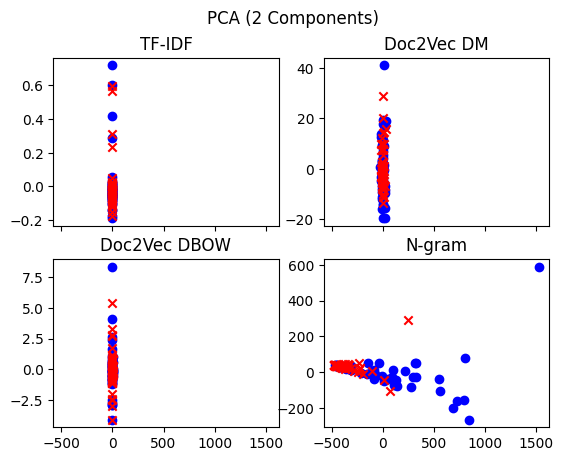

Perplexity of the test sentence: 36475.24265052901
Perplexity of the test sentence: 35321.82771952097
Perplexity of the test sentence: 44549.078477669784
Perplexity of the test sentence: 40869.3557030394
Perplexity of the test sentence: 36572.276661441494
Perplexity of the test sentence: 35946.955811489956
Perplexity of the test sentence: 44083.35329701011
Perplexity of the test sentence: 41514.889004781406
Perplexity of the test sentence: 49534.418003916326
Perplexity of the test sentence: 46011.40930912495
Perplexity of the test sentence: 38754.218577414875
Perplexity of the test sentence: 40906.347264800985
Perplexity of the test sentence: 40911.9392741046
Perplexity of the test sentence: 30397.600962648346
Perplexity of the test sentence: 37163.53222185792
Perplexity of the test sentence: 39980.73180729733
Perplexity of the test sentence: 36712.03072083051
Perplexity of the test sentence: 32862.00561517175
Perplexity of the test sentence: 30704.276137113415
Perplexity of the test s

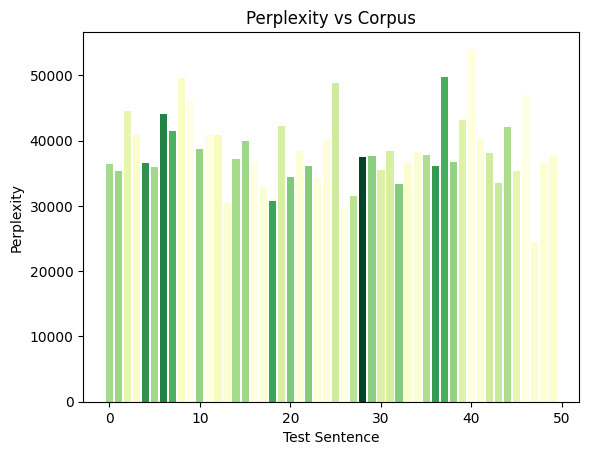

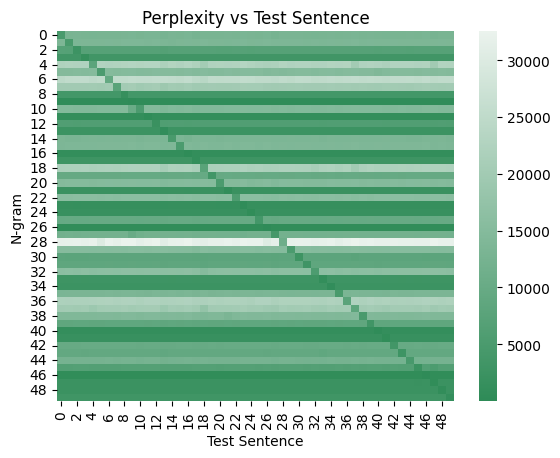

In [205]:
semantic_sim = SemanticSimilarity(3,corpus, test)
start_time = time.time()
semantic_sim.train(vec_size=50, num_epochs=100)
end_time = time.time()

execution_time = end_time - start_time
times.append(execution_time)
semantic_sim.ngram_metrics(3, corpus, test)

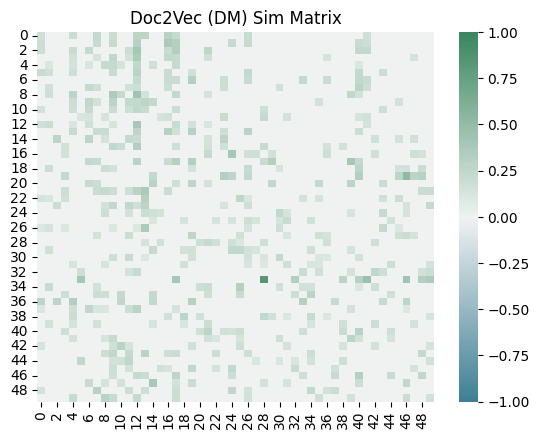

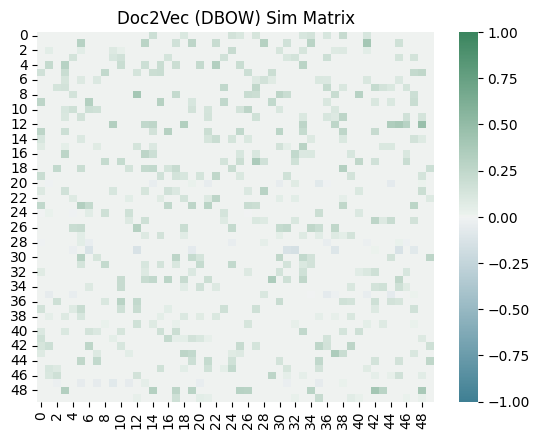

In [134]:
semantic_sim_dm = np.zeros((len(corpus), len(corpus)))
semantic_sim_dbow = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
  sim1 = semantic_sim.modelo_dm.dv.most_similar(semantic_sim.modelo_dm[i])
  sim2 = semantic_sim.modelo_dbow.dv.most_similar(semantic_sim.modelo_dbow[i])
  for s in sim1:
    semantic_sim_dm[i][s[0]] = s[1]
  for s in sim2:
    semantic_sim_dbow[i][s[0]] = s[1]

# print(semantic_sim_dm)
# print(semantic_sim_dbow)

c = sns.diverging_palette(220, 145, as_cmap=True)
sns.heatmap(semantic_sim_dm, cmap=c, vmin=-1, vmax=1)
plt.title('Doc2Vec (DM) Sim Matrix')
plt.show()

c = sns.diverging_palette(220, 145, as_cmap=True)
sns.heatmap(semantic_sim_dbow, cmap=c, vmin=-1, vmax=1)
plt.title('Doc2Vec (DBOW) Sim Matrix')
plt.show()

TEXTOS OPUESTOS


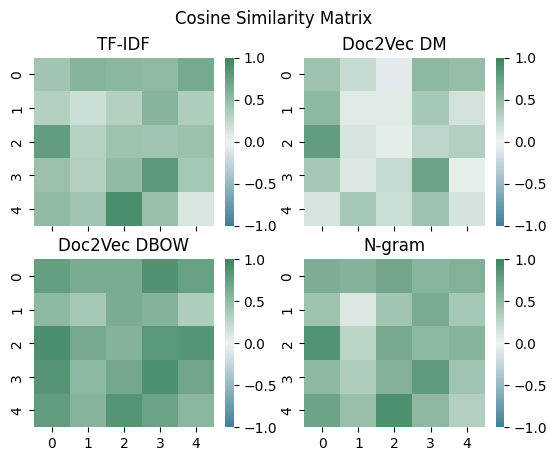

TEXTOS SIMILARES


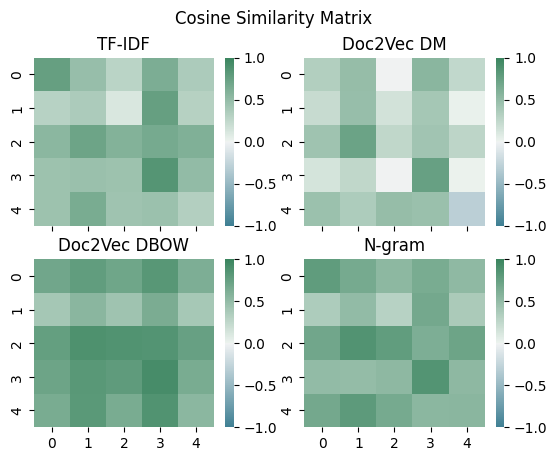

TEXTOS OPUESTOS


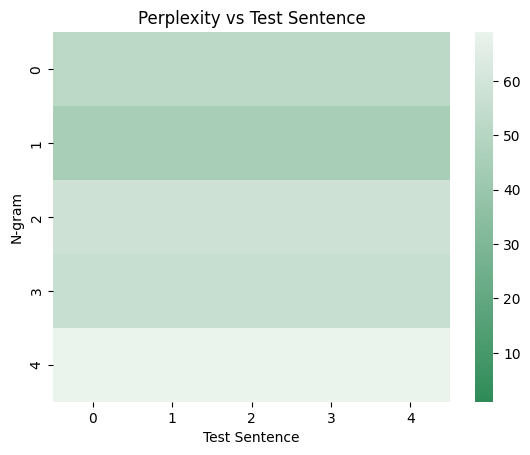

TEXTOS SIMILARES


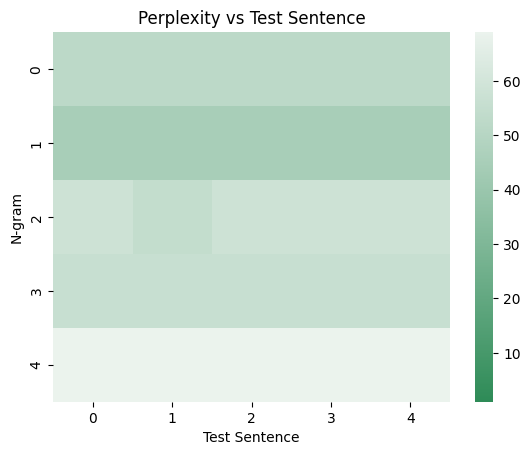

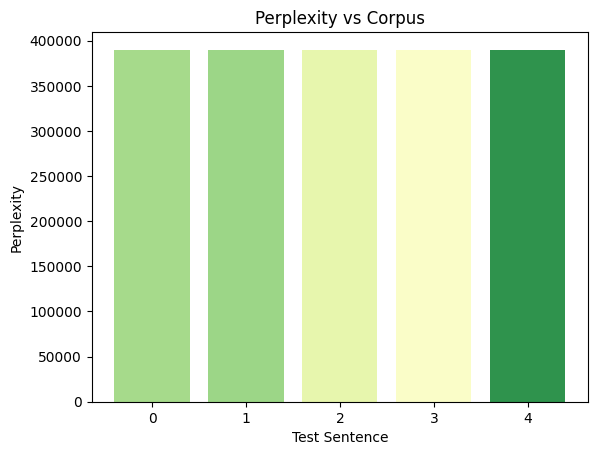

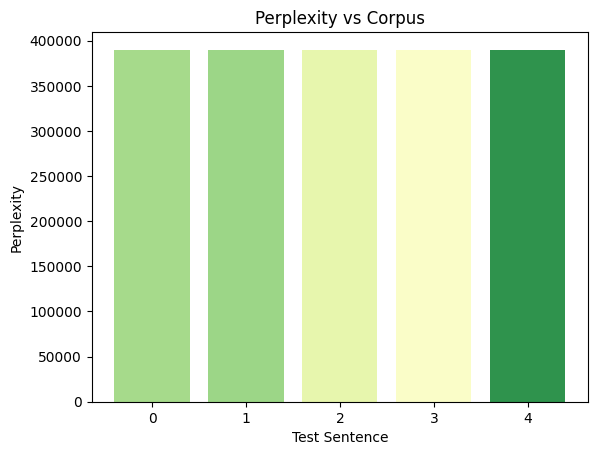

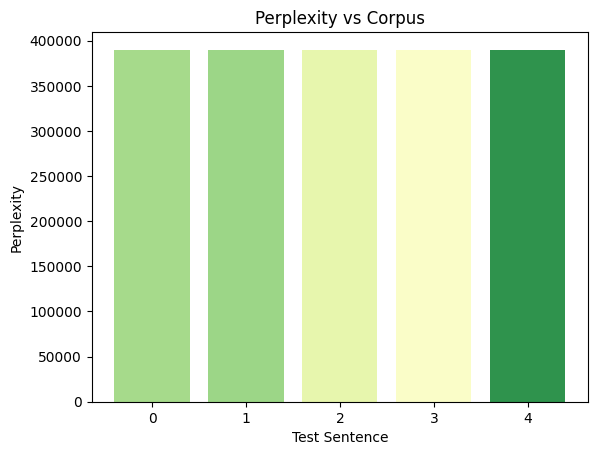

In [135]:
text_test = [
    "La energía solar se ha convertido en una de las fuentes más accesibles y sostenibles para la generación de electricidad.",
    "Las turbinas eólicas modernas pueden generar electricidad suficiente para alimentar miles de hogares en áreas rurales.",
    "La transición a fuentes de energía renovable es clave para reducir las emisiones de gases de efecto invernadero y combatir el cambio climático.",
    "Las innovaciones en energía geotérmica están permitiendo aprovechar el calor de la Tierra para generar electricidad y calefacción en diversas regiones.",
    "Los avances en tecnología de baterías han mejorado la capacidad de almacenamiento de energía renovable, facilitando la integración de fuentes solares y eólicas en la red eléctrica."
]


textos_opuestos = [
    "La cocina mediterránea es conocida por su uso de ingredientes frescos, como el aceite de oliva, los tomates y las hierbas aromáticas.",
    "La cocina molecular ha revolucionado la gastronomía moderna, combinando la ciencia con la creatividad para crear experiencias culinarias únicas.",
    "Los restaurantes de comida callejera en Asia ofrecen una diversidad de sabores auténticos que reflejan la riqueza cultural de la región.",
    "El aumento de las dietas basadas en plantas ha llevado a un auge en las opciones de comida vegana y vegetariana en todo el mundo.",
    "El arte de hacer sushi se ha transmitido durante generaciones, combinando ingredientes frescos y técnicas precisas para crear platos visualmente impresionantes."
]

textos_similares = [
    "La eficiencia energética se ha vuelto crucial para minimizar el desperdicio de recursos y reducir la huella de carbono global.",
    "El uso de vehículos eléctricos está ayudando a disminuir la dependencia de los combustibles fósiles y reducir las emisiones de dióxido de carbono.",
    "La agricultura sostenible busca integrar prácticas que respeten el medio ambiente y promuevan el uso de recursos naturales de manera equilibrada.",
    "Las ciudades inteligentes están adoptando tecnologías verdes para mejorar el uso eficiente de la energía y los recursos en las áreas urbanas.",
    "El reciclaje de materiales y la reducción de residuos son pasos esenciales para avanzar hacia una economía circular más respetuosa con el medio ambiente."
]

print("TEXTOS OPUESTOS")
semantic_sim.eval_sim(text_test, textos_opuestos, num_epochs=100)
print("TEXTOS SIMILARES")
semantic_sim.eval_sim(text_test, textos_similares, num_epochs=100)

print("TEXTOS OPUESTOS")
semantic_sim.ngram_metrics(3, text_test, textos_opuestos)
print("TEXTOS SIMILARES")
semantic_sim.ngram_metrics(3, text_test, textos_similares)

semantic_sim.ngram_metrics_corpus(3, text_test)
semantic_sim.ngram_metrics_corpus(3, textos_similares)
semantic_sim.ngram_metrics_corpus(3, textos_opuestos)

### 100 texts

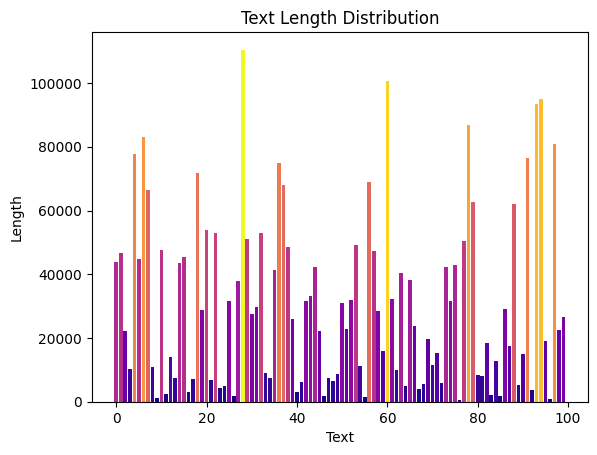

In [209]:
corpus = []
test = []
len_corpus = []
size=100

for text in wikidata["train"][0:size]["text"]:
  corpus = corpus + [text]
  len_corpus.append(len(corpus[-1]))
  r = np.random.randint(0, len(text)/2)
  test = test + [text[r:2*r]]


my_cmap = plt.get_cmap("plasma")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(range(size), len_corpus, color=my_cmap(rescale(len_corpus)))
plt.xlabel("Text")
plt.ylabel("Length")
plt.title("Text Length Distribution")
plt.show()

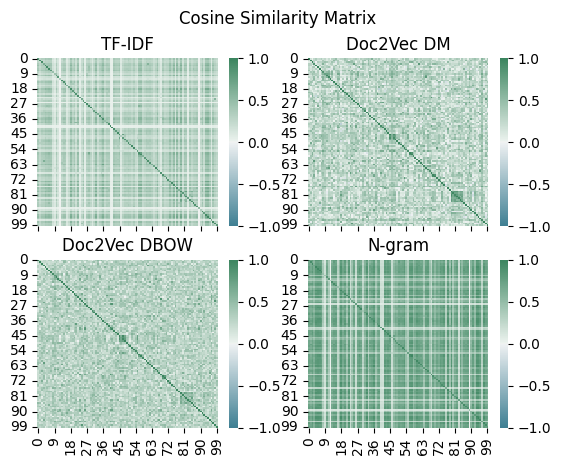

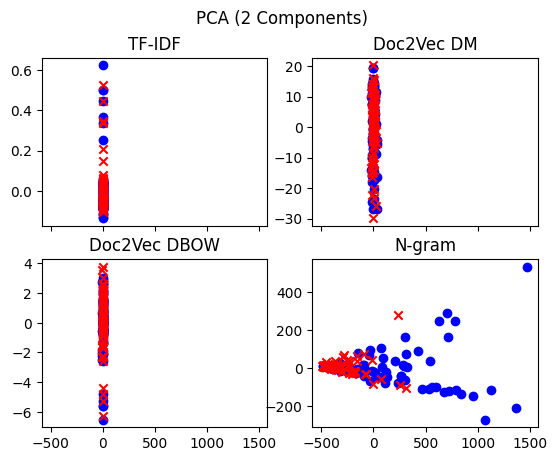

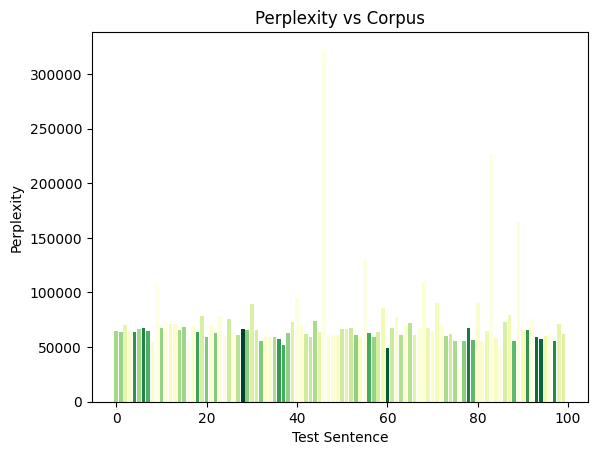

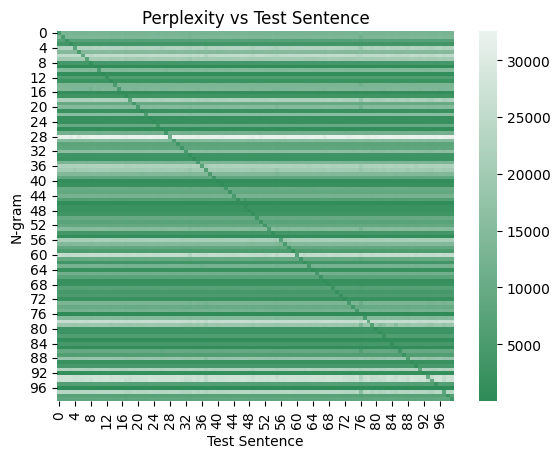

In [210]:
semantic_sim = SemanticSimilarity(3,corpus, test)
start_time = time.time()
semantic_sim.train(vec_size=30, num_epochs=100)
end_time = time.time()

execution_time = end_time - start_time
times.append(execution_time)
semantic_sim.ngram_metrics(3, corpus, test)

- Podemos apreciar que a medida que se aumenta el tamaño del corpus, se pueden obtener mediciones mas precisas de similitud
- Un corpus reducido requiere que se reduzca las dimensiones de los vectores a codificar, y aumentar el número de épocas de entrenamiento
- La perplejidad aumenta considerablemente cuando se tiene que predecir textos demasiado extensos